In [20]:
print("Name: Ashutosh Chauhan")
print("2020UEE0132")

Name: Ashutosh Chauhan
2020UEE0132


In [25]:
!pip install numpy matplotlib Pillow

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [22]:
# M stands for polynomial degree in the form x^M + x^M-1 + x^M-2 + .... + x

M = 10

In [23]:
x = np.random.normal(size = 1000)
x_val = np.random.normal(size = 200)

In [24]:
# dataset is sorted to avoid jitter in plots.
x = np.sort(x)
x_val = np.sort(x_val)

In [5]:
y = np.sin(1 + x**2)
y_val = np.sin(1 + x_val**2)

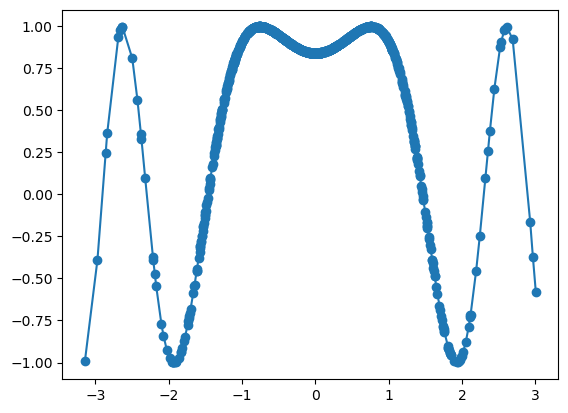

In [6]:
# plt.scatter(x, y, color = 'green')
plt.plot(x, y, 'o-')

In [7]:
phi = x.reshape(len(x), 1)
phi_val = x_val.reshape(len(x_val), 1)
y = y.reshape(len(y), 1)

Reference: Linear Models for Regression, Class Slides


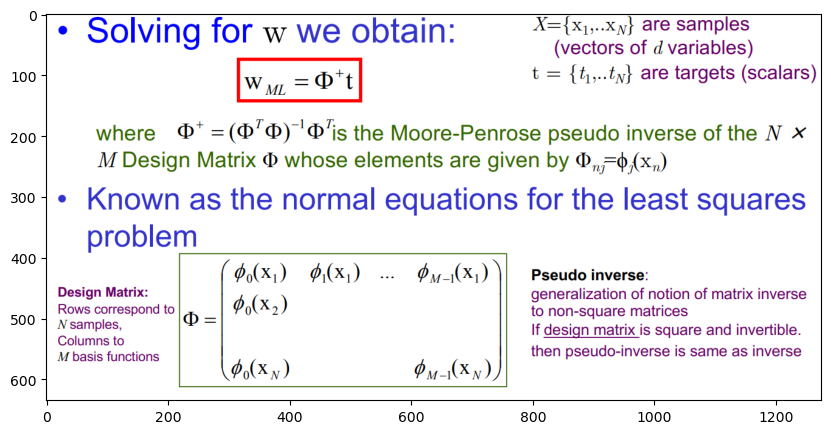

In [8]:
from PIL import Image
least_squares = np.array(Image.open("./least_squares.png"))[:, :, :3]

plt.figure(figsize = (10, 10))
plt.imshow(least_squares)

print("Reference: Linear Models for Regression, Class Slides")

In [9]:
y_hats = np.empty_like(y.T)
y_val_hats = np.empty_like(y_val.T)

for m in range(M):
    phi_poly = np.repeat(phi, m + 1, 1) # Design matrix.
    phi_val_poly = np.repeat(phi_val, m + 1, 1)

    for i in range(m + 1):
        # Important step: Convert training and validation data into polynomial form.
        phi_poly[:, i] = np.power(phi_poly[:, i], i + 1)
        phi_val_poly[:, i] = np.power(phi_val_poly[:, i], i + 1)

    # Find weights using Least Square Solution
    b = np.linalg.inv(phi_poly.T.dot(phi_poly)).dot(phi_poly.T).dot(y)

    yhat = phi_poly.dot(b)
    y_val_hat = phi_val_poly.dot(b)
    y_val_hats = np.vstack((y_val_hats, y_val_hat.T))
    y_hats = np.vstack((y_hats, yhat.T))

y_hats = y_hats[1:, :]
y_val_hats = y_val_hats[1:, :]
print(y_hats.shape)

(10, 1000)


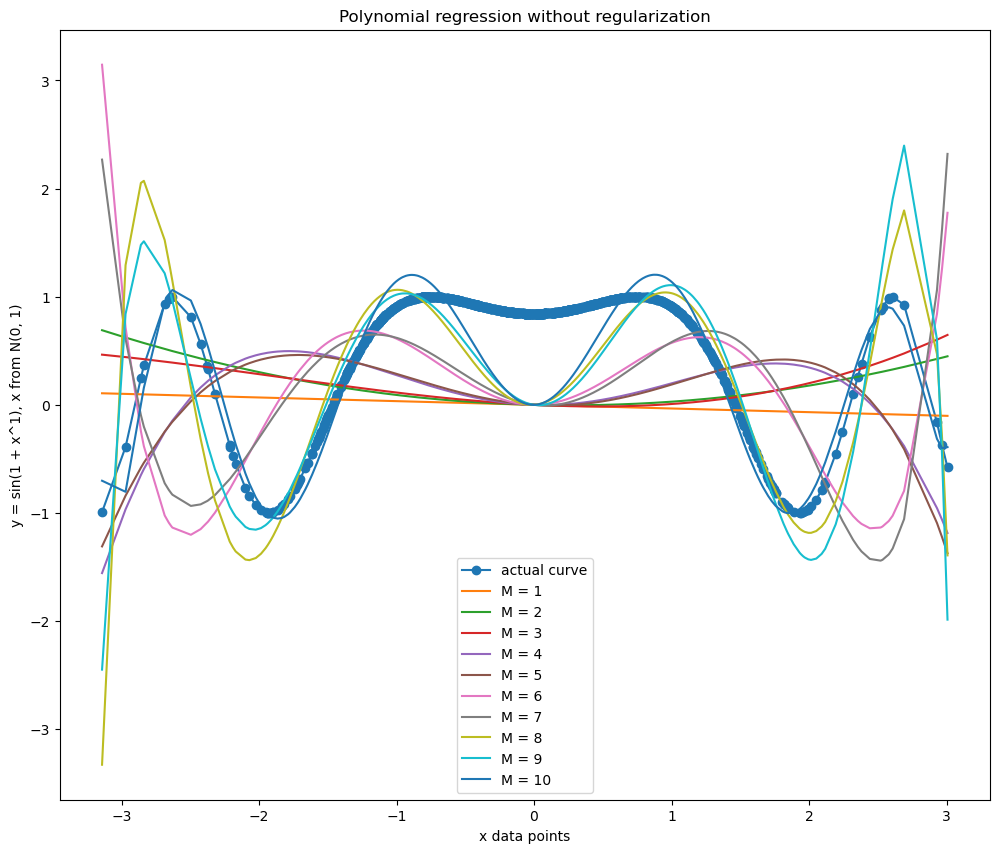

In [10]:
# Plots curve fits for all degrees of polynomial regression.

plt.figure(figsize = (12, 10))
plt.plot(x, y, 'o-', label = 'actual curve')

plt.xlabel("x data points")
plt.ylabel("y = sin(1 + x^1), x from N(0, 1)")

for m in range(0, M):
    plt.plot(x, y_hats[m], '-', label = "M = " + str(m + 1))

plt.legend()
plt.title("Polynomial regression without regularization")
plt.show()

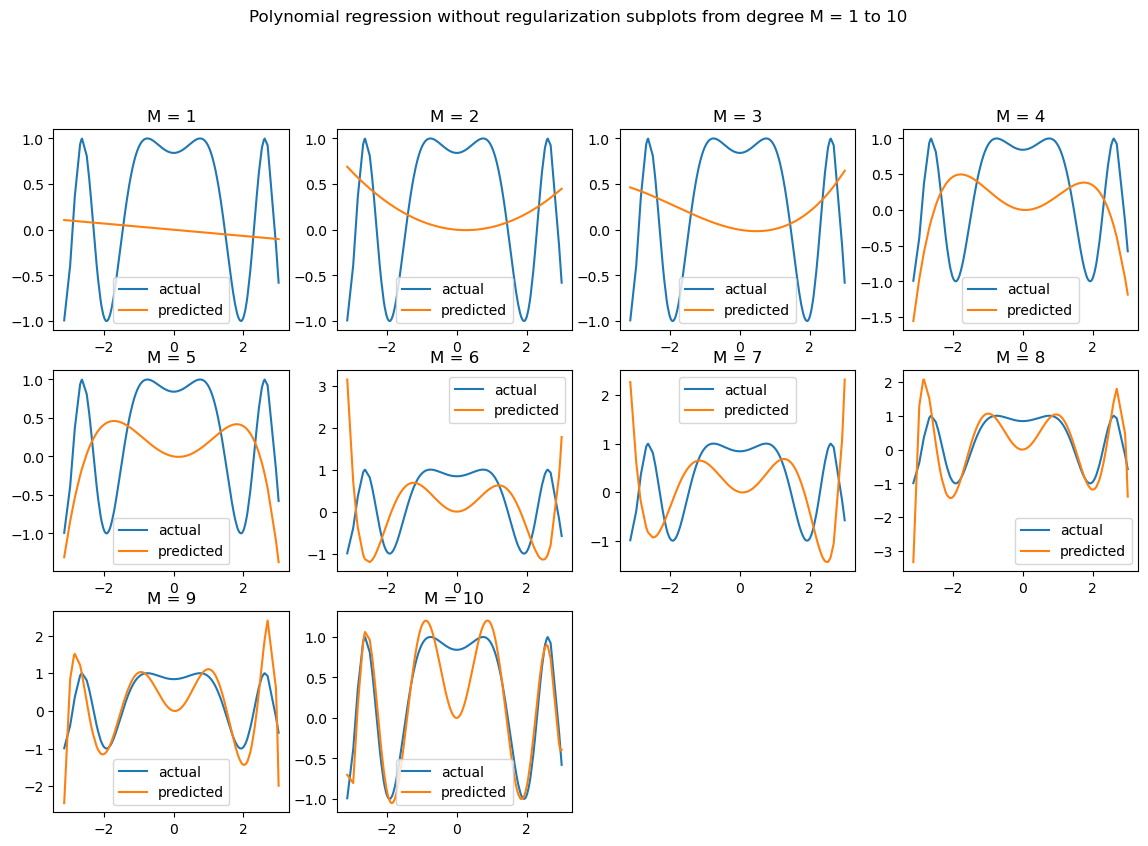

In [11]:
# Outputs for every degree is shown seperately for better visualization.

fig = plt.figure(figsize=(14, 12))

fig.suptitle("Polynomial regression without regularization subplots from degree M = 1 to " + str(M))

colors = list(mcolors.TABLEAU_COLORS.values())

nrows = int(np.ceil(np.sqrt(M)))
ncols = nrows

for m in range(M):
    ax = fig.add_subplot(nrows, ncols, m + 1)
    ax.set_title("M = " + str(m + 1))
    ax.plot(x, y, label = 'actual')
    ax.plot(x, y_hats[m], label = 'predicted')
    # ax.plot(x_val, y_val, label = 'predicted', color = colors[m + 1])
    # ax.plot(x_val, y_val_hats[m], label = 'predicted', color = colors[m])
    ax.legend()

Mean square error for different degrees of polynomial regression 

For M = 1 train MSE is 0.7171968353653378 and validation MSE is 0.717959357275592
For M = 2 train MSE is 0.7064904127513321 and validation MSE is 0.7119931973595532
For M = 3 train MSE is 0.7058485196493691 and validation MSE is 0.7146636171957138
For M = 4 train MSE is 0.6657321996935927 and validation MSE is 0.6656446575000197
For M = 5 train MSE is 0.6652886543612678 and validation MSE is 0.6664811315782818
For M = 6 train MSE is 0.5372059117690514 and validation MSE is 0.5986834075662644
For M = 7 train MSE is 0.53213876838541 and validation MSE is 0.6355926122157737
For M = 8 train MSE is 0.2540959248221674 and validation MSE is 0.3340570376380185
For M = 9 train MSE is 0.2446769407459906 and validation MSE is 0.42167170997372894
For M = 10 train MSE is 0.18741076554226271 and validation MSE is 0.2161849458725653

Minimum error is found for M = 10 and its value is 0.18741076554226271


Text(0.5, 0, 'Polynomial degree M')

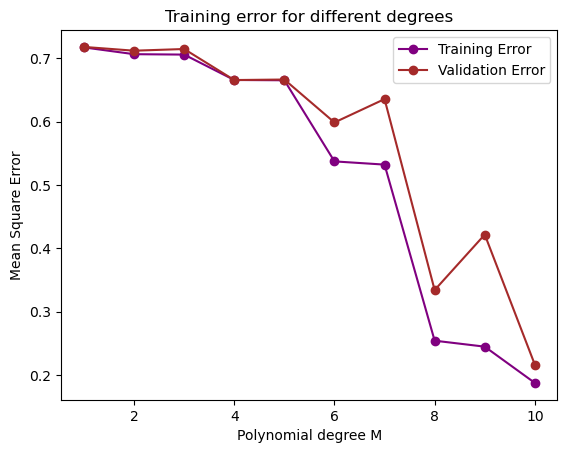

In [12]:
y_reps = y.T.repeat(M, axis = 0)

mean_error = ((y_reps - y_hats)**2).mean(axis = 1)
val_mean_error = ((y_val - y_val_hats)**2).mean(axis = 1)

print("Mean square error for different degrees of polynomial regression \n")

for m in range(M):
    print('For M = ' + str(m + 1) + " train MSE is " + str(mean_error[m]) + " and validation MSE is " + str(val_mean_error[m]))

min_index = np.argmin(mean_error)

print()
print("Minimum error is found for M = {} and its value is {}".format(min_index + 1, mean_error[min_index]))

ms = list(range(1, M + 1))

plt.title("Training error for different degrees")
plt.plot(ms, mean_error, "o-", color = 'purple', label = "Training Error")
plt.plot(ms, val_mean_error, "o-", color = "brown", label = "Validation Error")
plt.legend()
plt.ylabel("Mean Square Error")
plt.xlabel("Polynomial degree M")

/tmp/ipykernel_12735/395976245.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


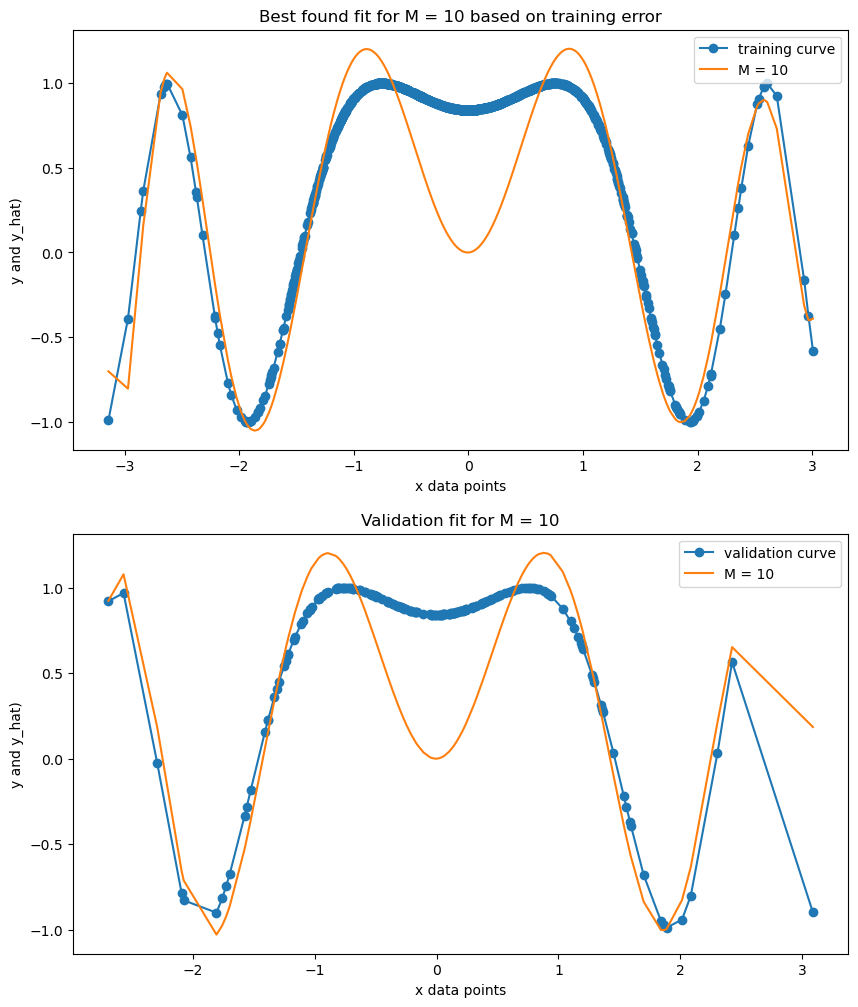

In [13]:
fig = plt.figure(figsize = (10, 12))

ax1 = fig.add_subplot(2, 1, 1)

ax1.plot(x, y, 'o-', label = 'training curve')

ax1.set_xlabel("x data points")
ax1.set_ylabel("y and y_hat)")

ax1.plot(x, y_hats[min_index], '-', label = "M = " + str(min_index + 1))

ax1.legend()
ax1.set_title("Best found fit for M = {} based on training error".format(min_index + 1))


ax2 = fig.add_subplot(2, 1, 2)

ax2.plot(x_val, y_val, 'o-', label = 'validation curve')

ax2.set_xlabel("x data points")
ax2.set_ylabel("y and y_hat)")

ax2.plot(x_val, y_val_hats[min_index], '-', label = "M = " + str(min_index + 1))

ax2.legend()
ax2.set_title("Validation fit for M = {}".format(min_index + 1))


fig.show()

For regularization, Reference: D. Leykekhman - MATH 3795 Introduction to Computational Mathematics


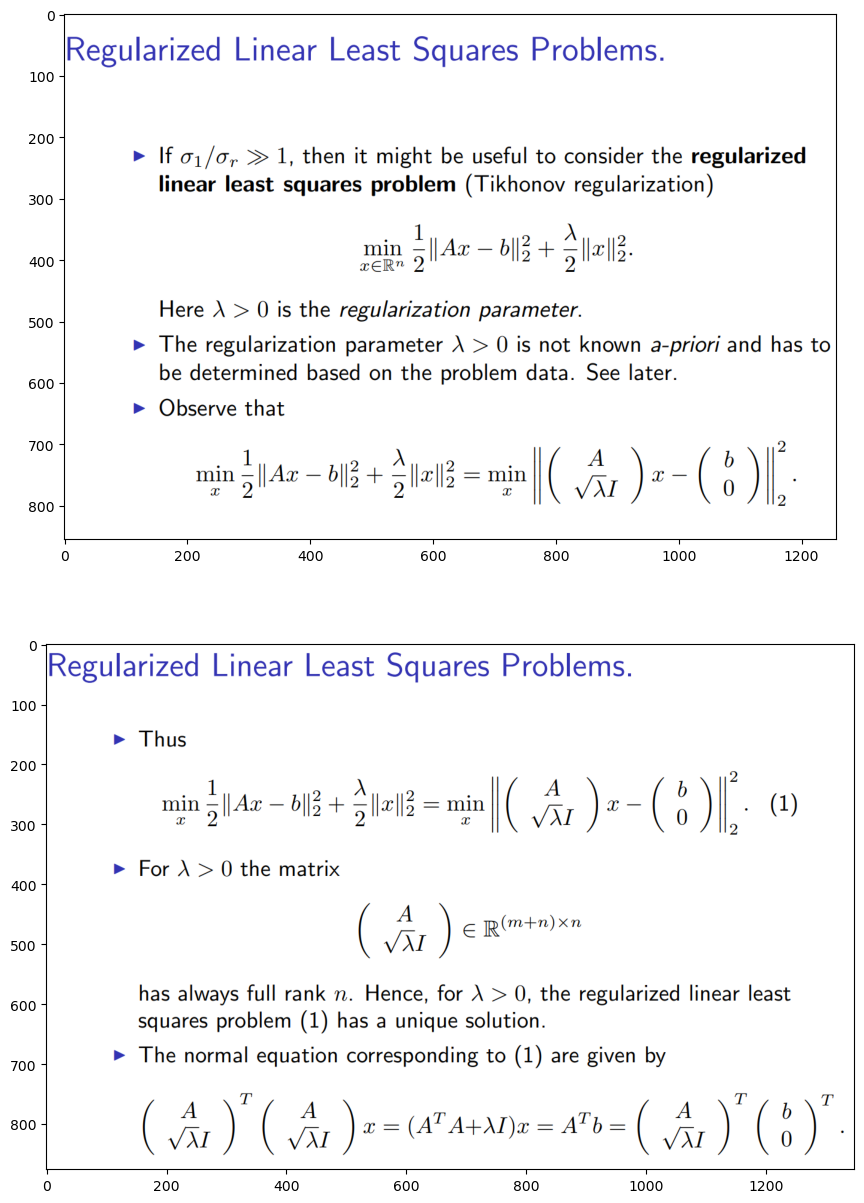

In [14]:
# With regularization
print("For regularization, Reference: D. Leykekhman - MATH 3795 Introduction to Computational Mathematics")
# https://www2.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_10_Linear_least_squares_reg.pdf

from PIL import Image
reg_least_squares1 = np.array(Image.open("./regularized_least_squares_1.png"))[:, :, :3]
reg_least_squares2 = np.array(Image.open("./regularized_least_squares_2.png"))[:, :, :3]

fig = plt.figure(figsize = (20, 15))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax1.axis('off')
# ax2.axis('off')
ax1.imshow(reg_least_squares1)
ax2.imshow(reg_least_squares2)

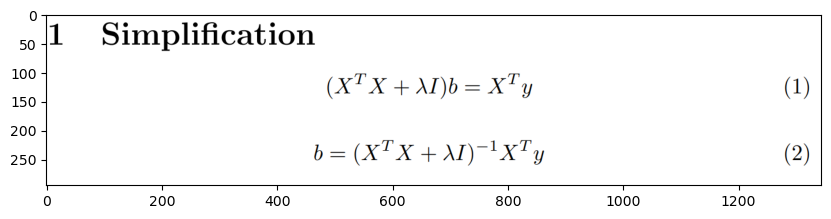

In [15]:
from PIL import Image
simplification = np.array(Image.open("./simplification.png"))[:, :, :3]

plt.figure(figsize = (10, 15))

plt.imshow(simplification)

In [16]:
lambdas = [100, 10, 1, 0.1, 0.01, 0.001]

y_lam_hats = None
y_lam_val_hats = None

for lam in lambdas:
    y_hats = np.empty_like(y.T)
    y_val_hats = np.empty_like(y_val.T)

    for m in range(M):
        phi_poly = np.repeat(phi, m + 1, 1)
        phi_val_poly = np.repeat(phi_val, m + 1, 1)

        for i in range(m + 1):
            phi_poly[:, i] = np.power(phi_poly[:, i], i + 1)
            phi_val_poly[:, i] = np.power(phi_val_poly[:, i], i + 1)

        #  Important step: Regularization least squares solution is found by modifying the LSS as shown above figure.
        b = np.linalg.inv(phi_poly.T.dot(phi_poly) + lam * np.identity(len(phi_poly.T))).dot(phi_poly.T).dot(y)

        yhat = phi_poly.dot(b)
        y_val_hat = phi_val_poly.dot(b)
        y_val_hats = np.vstack((y_val_hats, y_val_hat.T))
        y_hats = np.vstack((y_hats, yhat.T))

    y_hats = y_hats[1:, :]
    y_val_hats = y_val_hats[1:, :]

    if y_lam_hats is None:
        y_lam_hats = np.expand_dims(y_hats, axis = 0)
        y_lam_val_hats = np.expand_dims(y_val_hats, axis = 0)
    else:
        y_lam_hats = np.vstack((y_lam_hats, np.expand_dims(y_hats, axis = 0)))
        y_lam_val_hats = np.vstack((y_lam_val_hats, np.expand_dims(y_val_hats, axis = 0)))

print(y_lam_hats.shape)
print(y_lam_val_hats.shape)

(6, 10, 1000)
(6, 10, 200)


/tmp/ipykernel_12735/774855310.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


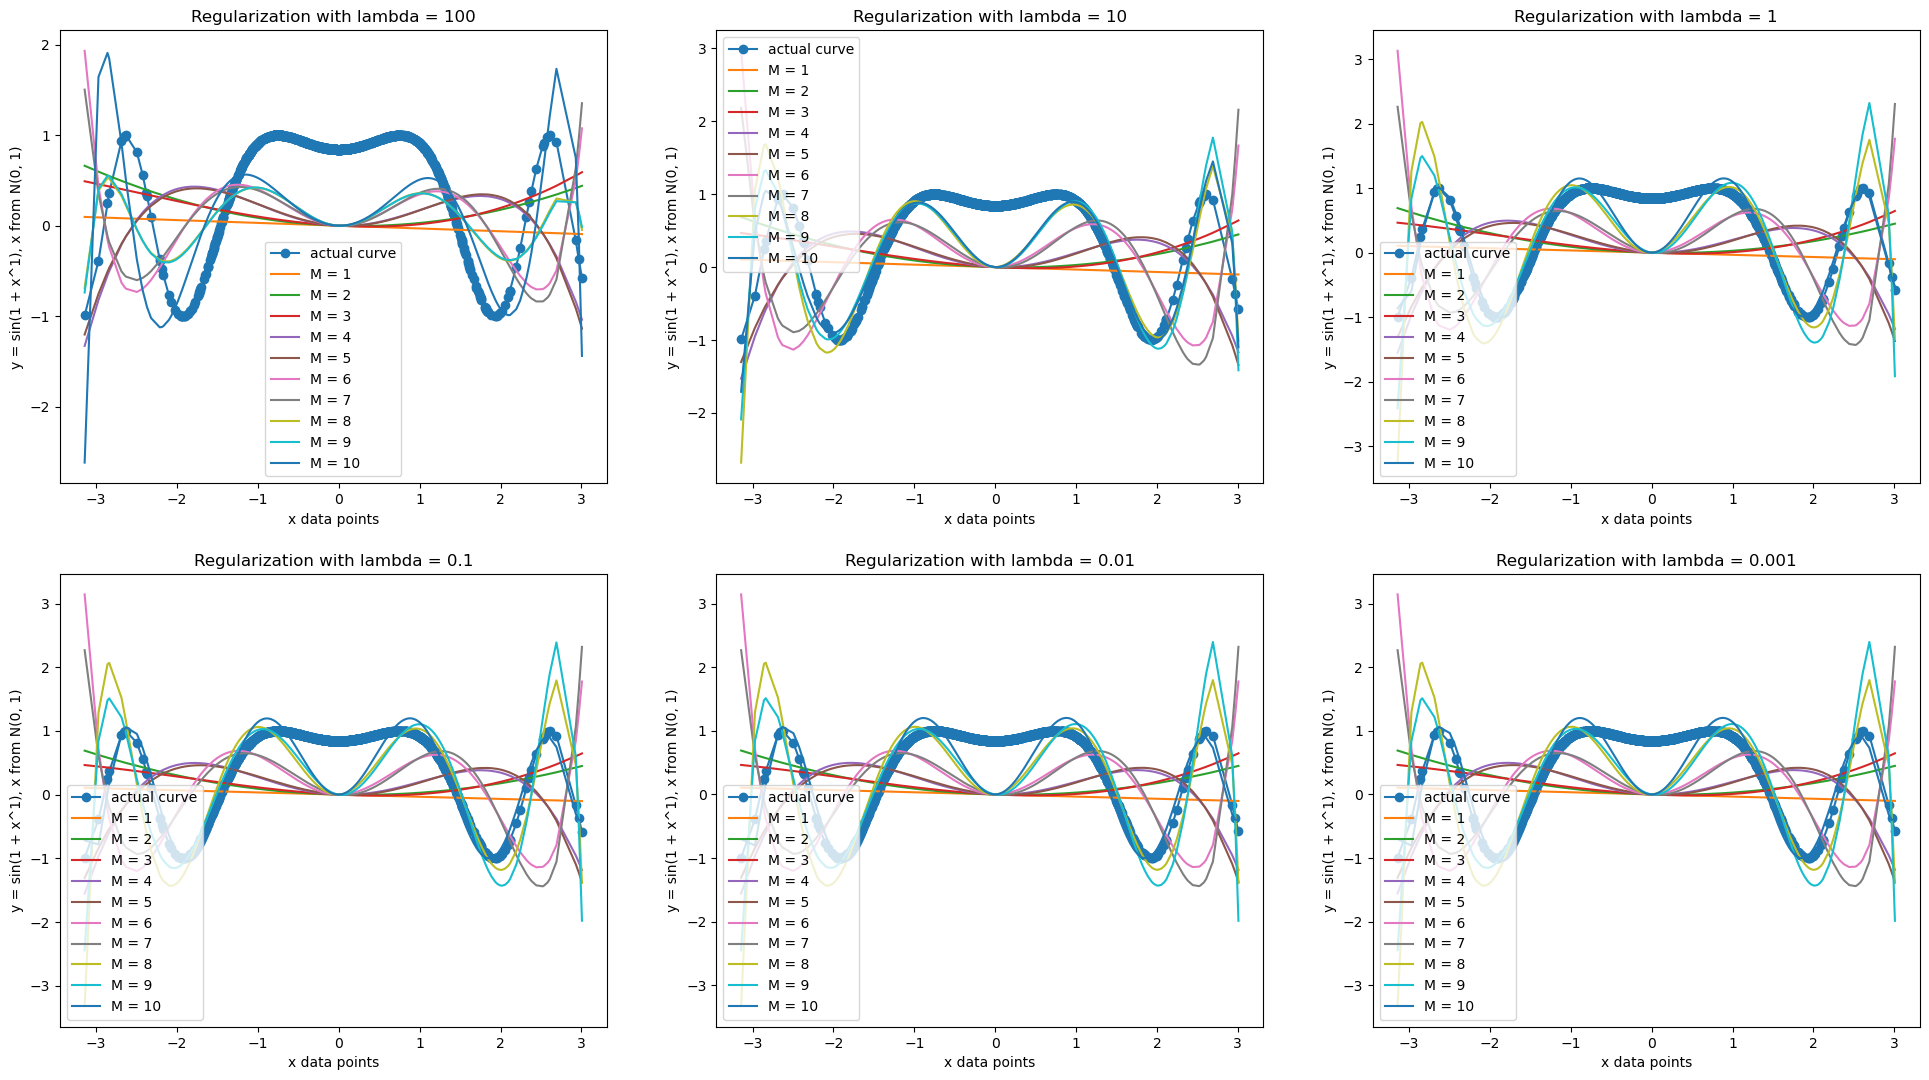

In [17]:
fig = plt.figure(figsize = (24, 20))

for idx, y_hats in enumerate(y_lam_hats):
    ax = fig.add_subplot(int(np.ceil(np.sqrt(len(lambdas)))), int(np.ceil(np.sqrt(len(lambdas)))), idx + 1)
    ax.plot(x, y, 'o-', label = 'actual curve')
    ax.set_title("Regularization with lambda = " + str(lambdas[idx]))
    ax.set_xlabel("x data points")
    ax.set_ylabel("y = sin(1 + x^1), x from N(0, 1)")

    for m in range(0, M):
        plt.plot(x, y_hats[m], '-', label = "M = " + str(m + 1))

    plt.legend()
    # plt.title("Polynomial regression without regularization")
fig.show()

For lambda = 100
Mean square error for different degrees of polynomial regression 

For M = 1 train MSE is 0.7172065464540931 and validation MSE is 0.7183555556244312
For M = 2 train MSE is 0.7065094555426954 and validation MSE is 0.7122507277180873
For M = 3 train MSE is 0.7059318439281121 and validation MSE is 0.7143592373097295
For M = 4 train MSE is 0.6667047872912751 and validation MSE is 0.6671903905967003
For M = 5 train MSE is 0.6664239277648359 and validation MSE is 0.667317433057645
For M = 6 train MSE is 0.5620584116805089 and validation MSE is 0.5948721376691948
For M = 7 train MSE is 0.5594716241520454 and validation MSE is 0.6059935216517657
For M = 8 train MSE is 0.46170227307584266 and validation MSE is 0.47407921412536136
For M = 9 train MSE is 0.4619611889079472 and validation MSE is 0.4742289093615964
For M = 10 train MSE is 0.438717886441989 and validation MSE is 0.5598333269365495
Minimum validation error is found for M = 8 and its value is 0.47407921412536136

For

/tmp/ipykernel_12735/2600484419.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


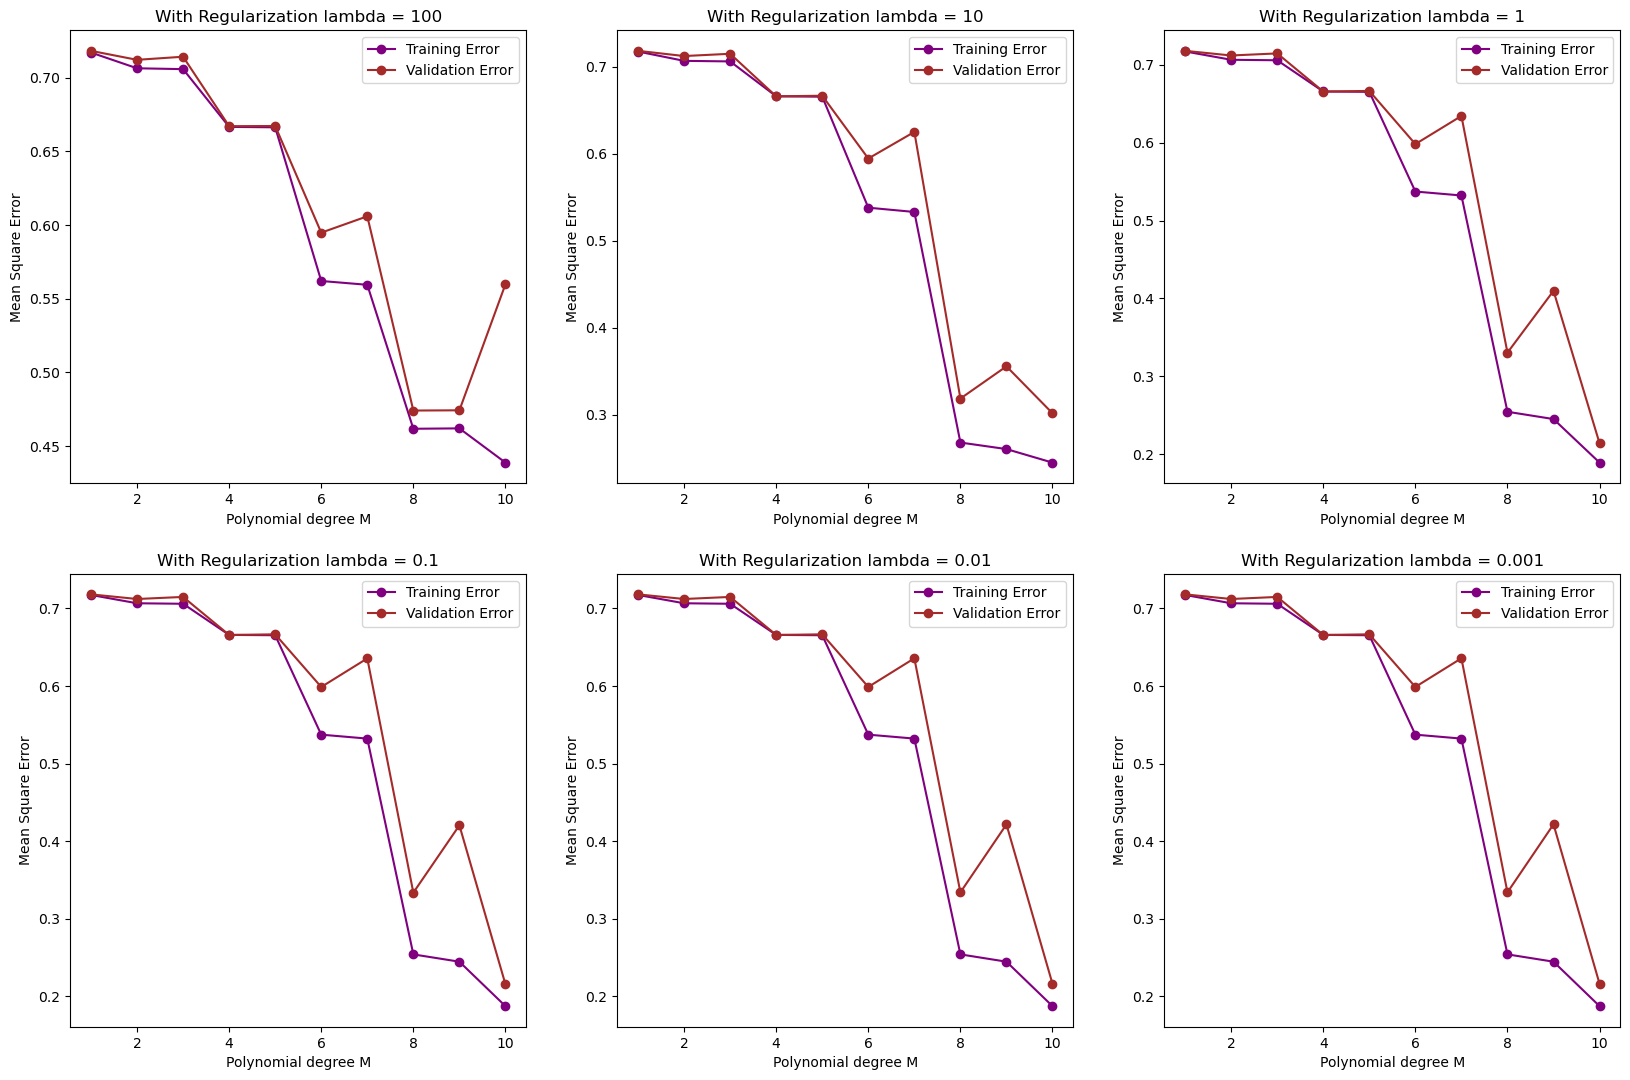

In [18]:
y_reps = y.T.repeat(M, axis = 0)

fig = plt.figure(figsize = (20, 20))

min_error = None
min_degree = None
min_lambda = None

for idx, y_hats in enumerate(y_lam_hats):
    print("For lambda = " + str(lambdas[idx]))
    mean_error = ((y_reps - y_hats)**2).mean(axis = 1)
    val_mean_error = ((y_val - y_lam_val_hats[idx])**2).mean(axis = 1)

    print("Mean square error for different degrees of polynomial regression \n")

    for m in range(M):
        print('For M = ' + str(m + 1) + " train MSE is " + str(mean_error[m]) + " and validation MSE is " + str(val_mean_error[m]))

    min_index = np.argmin(val_mean_error)

    if min_error is None or val_mean_error[min_index] < min_degree:
        min_error = val_mean_error[min_index]
        min_degree = min_index + 1
        min_lambda = idx


    print("Minimum validation error is found for M = {} and its value is {}".format(min_index + 1, val_mean_error[min_index]))
    print()

    ms = list(range(1, M + 1))

    ax = fig.add_subplot(int(np.ceil(np.sqrt(len(lambdas)))), int(np.ceil(np.sqrt(len(lambdas)))), idx + 1)
    ax.set_title("With Regularization lambda = " + str(lambdas[idx]))

    ax.plot(ms, mean_error, "o-", color = 'purple', label = "Training Error")
    ax.plot(ms, val_mean_error, "o-", color = "brown", label = "Validation Error")
    ax.legend()
    ax.set_ylabel("Mean Square Error")
    ax.set_xlabel("Polynomial degree M")

print('Minimum validation error is {} for M = {} and lambda = {}'.format(min_error, min_degree, lambdas[min_lambda]))

fig.show()

/tmp/ipykernel_12735/626183472.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


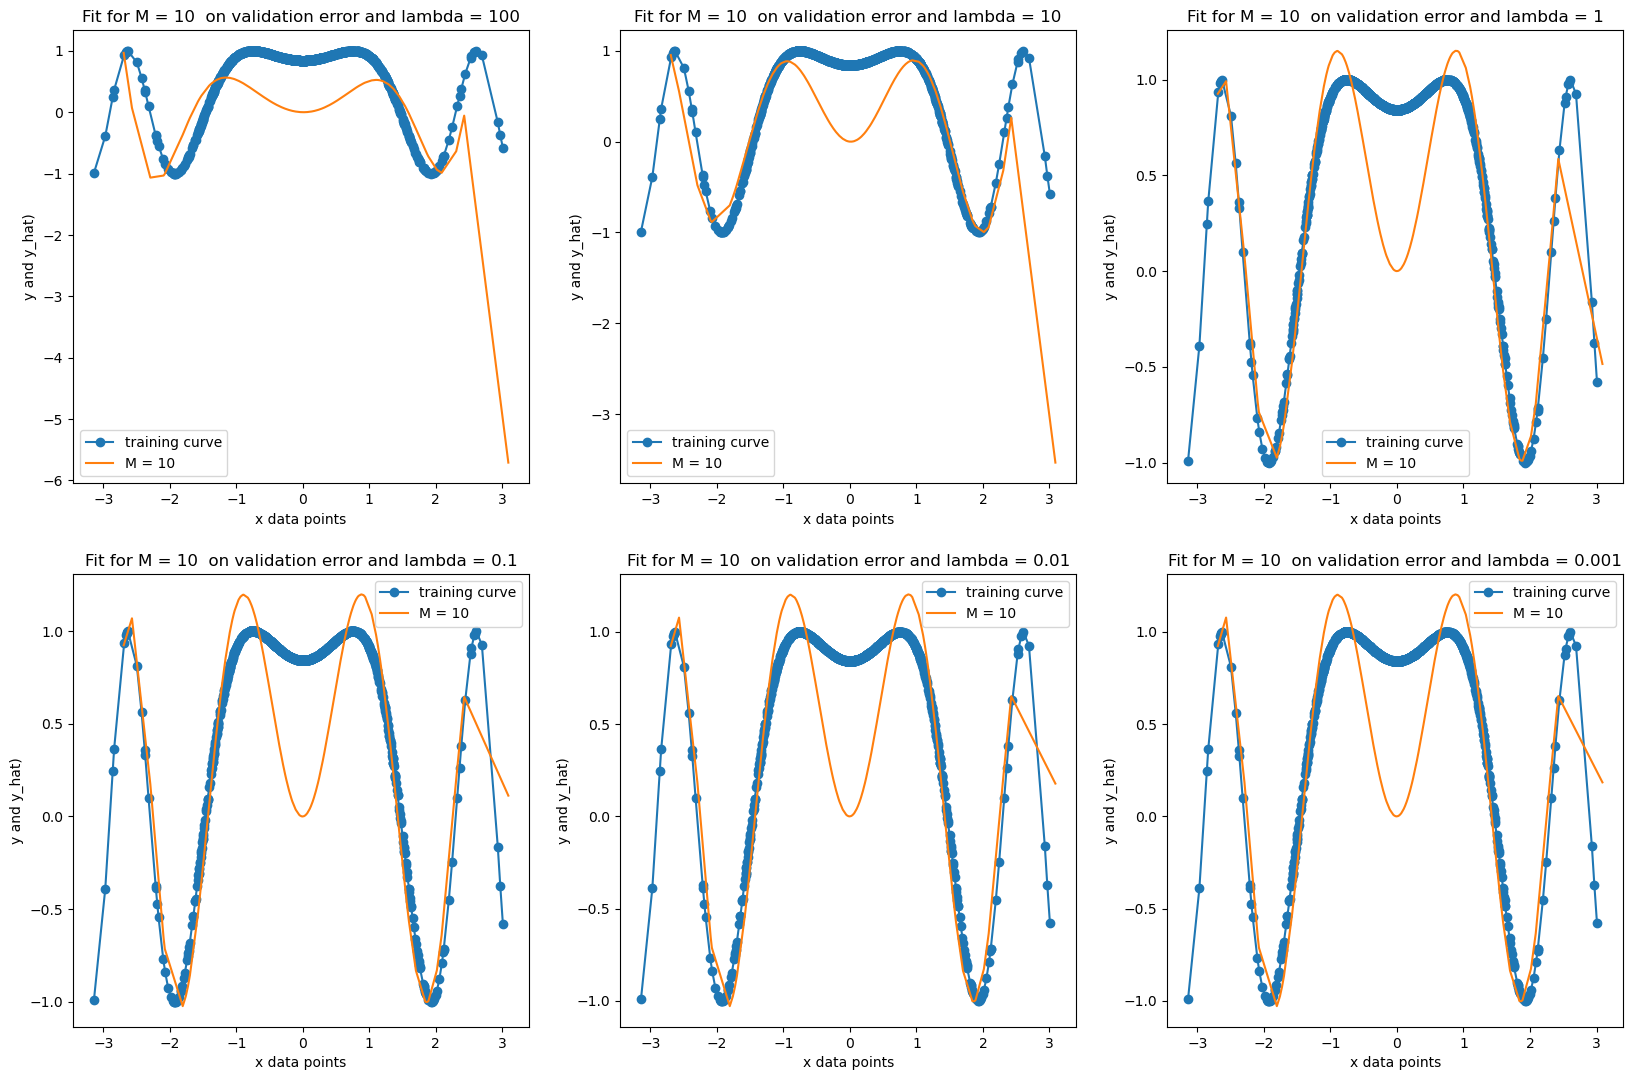

In [19]:
fig = plt.figure(figsize = (20, 20))

for idx, y_hats in enumerate(y_lam_val_hats):

    ax1 = fig.add_subplot(int(np.ceil(np.sqrt(len(lambdas)))), int(np.ceil(np.sqrt(len(lambdas)))), idx + 1)

    ax1.plot(x, y, 'o-', label = 'training curve')

    ax1.set_xlabel("x data points")
    ax1.set_ylabel("y and y_hat)")

    ax1.plot(x_val, y_hats[min_degree - 1], '-', label = "M = " + str(min_index + 1))

    ax1.legend()
    ax1.set_title("Fit for M = {}  on validation error and lambda = {}".format(min_index + 1, lambdas[idx]))

fig.show()